# 📊 NLP | Medical Abstract Segmentation

## 🏥 Project Overview
This notebook aims to **reproduce the Kaggle NLP Medical Abstract Segmentation project** using the **PubMed 20k RCT dataset**.

### **🔹 Key Steps**
- Load and inspect the dataset
- Apply **text preprocessing** (stopwords removal, punctuation cleanup, lowercasing)
- Perform **Exploratory Data Analysis (EDA)**
- Train a model for **classifying abstract segments**

## 🚀 Step 1: Load & Inspect the Data

In [10]:
import pandas as pd
import os
import nltk
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from wordcloud import WordCloud

# Download stopwords if not already available
nltk.download("stopwords")
nltk.download("punkt")

# Define dataset paths
data_folder = r"C:\Users\olive\NLP-Medical-Abstract-Segmentation\data"
train_path = os.path.join(data_folder, "train.csv")
dev_path = os.path.join(data_folder, "dev.csv")
test_path = os.path.join(data_folder, "test.csv")

# Load datasets
df_train = pd.read_csv(train_path)
df_dev = pd.read_csv(dev_path)
df_test = pd.read_csv(test_path)

# Display dataset info
print(f"Train Data Shape: {df_train.shape}")
print(f"Dev Data Shape: {df_dev.shape}")
print(f"Test Data Shape: {df_test.shape}")

df_train.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\olive\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Train Data Shape: (180040, 6)
Dev Data Shape: (30212, 6)
Test Data Shape: (30135, 6)


,abstract_id,line_id,abstract_text,line_number,total_lines,target
0,24293578,24293578_0_12,To investigate the efficacy of 6 weeks of dail...,0,12,OBJECTIVE
1,24293578,24293578_1_12,A total of 125 patients with primary knee OA w...,1,12,METHODS
2,24293578,24293578_2_12,Outcome measures included pain reduction and i...,2,12,METHODS
3,24293578,24293578_3_12,Pain was assessed using the visual analog pain...,3,12,METHODS
4,24293578,24293578_4_12,Secondary outcome measures included the Wester...,4,12,METHODS


In [12]:
# Rename 'abstract_text' to 'sentence' for consistency
df_train = df_train.rename(columns={"abstract_text": "sentence"})
df_dev = df_dev.rename(columns={"abstract_text": "sentence"})
df_test = df_test.rename(columns={"abstract_text": "sentence"})

# Define stopwords and punctuation removal
stop_words = set(stopwords.words("english"))

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, punctuation, and extra whitespace
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove links (if any)
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Tokenize words and remove stopwords
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    
    return " ".join(words)

# Apply cleaning to the dataset
df_train["cleaned_sentence"] = df_train["sentence"].apply(clean_text)

# Show cleaned data
df_train[["sentence", "cleaned_sentence"]].head()


,sentence,cleaned_sentence
0,To investigate the efficacy of 6 weeks of dail...,investigate efficacy weeks daily lowdose oral ...
1,A total of 125 patients with primary knee OA w...,total patients primary knee oa randomized rece...
2,Outcome measures included pain reduction and i...,outcome measures included pain reduction impro...
3,Pain was assessed using the visual analog pain...,pain assessed using visual analog pain scale mm
4,Secondary outcome measures included the Wester...,secondary outcome measures included western on...


C:\Users\olive\AppData\Local\Temp\ipykernel_9068\2609871390.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_train, x="target", order=df_train["target"].value_counts().index, palette="coolwarm")


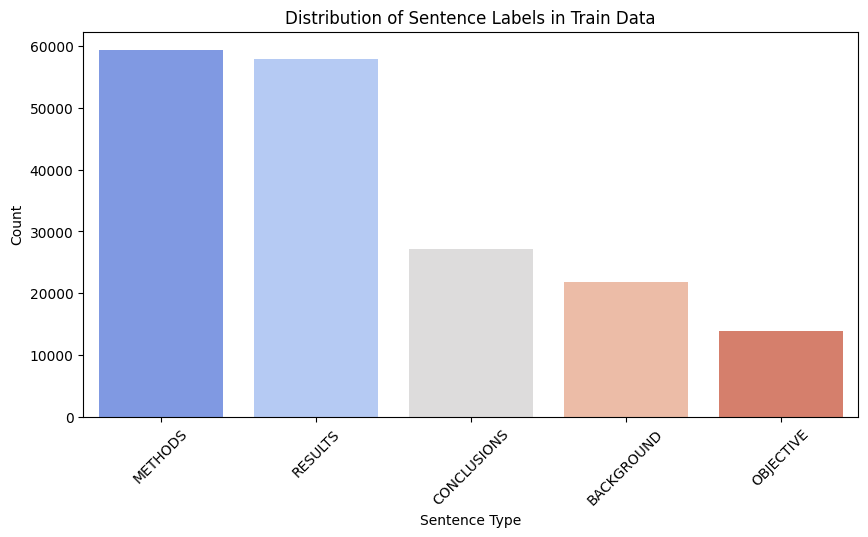

In [13]:
# Plot label distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df_train, x="target", order=df_train["target"].value_counts().index, palette="coolwarm")
plt.title("Distribution of Sentence Labels in Train Data")
plt.xlabel("Sentence Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


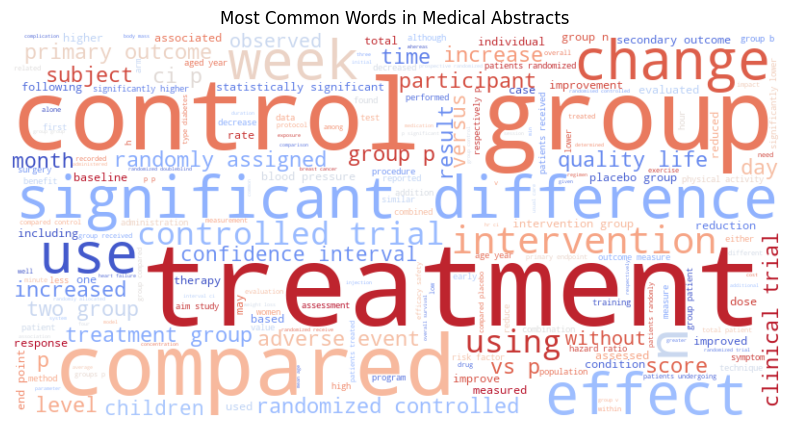

In [14]:
# Generate word cloud for most common words
text = " ".join(df_train["cleaned_sentence"])

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm", max_words=200).generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Medical Abstracts")
plt.show()
